# 1. DataFrame

In [152]:
df_pitcher_perf = pd.read_csv('pitcher_perf.csv', index_col=0)
df_pitcher_etc = pd.read_csv('pitcher_etc.csv', index_col=0)

In [153]:
df_pitcher_perf.columns,df_pitcher_etc.columns

(Index([u'이름', u'연도', u'연봉(=Y)', u'총액(억)', u'계약년수(년)', u'연도.1', u'ERA_A', u'FIP_A', u'WAR_A', u'K/9_A', u'BB/9_A', u'HR/9_A', u'BIPA_A', u'LOB_A', u'AVG_A', u'OBP_A', u'WHIP_A', u'IP/G_A', u'ERA_B', u'FIP_B', u'WAR_B', u'K/9_B', u'BB/9_B', u'HR/9_B', u'BIPA_B', u'LOB_B', u'AVG_B', u'OBP_B', u'WHIP_B', u'IP/G_B'], dtype='object'),
 Index([u'Name', u'Year', u'Spectators', u'TitleSponsors', u'Broadcasting', u'GDP', u'Clubs', u'FA_Pitcher', u'FA_Hitter', u'BirthYear', u'Age', u'Captain', u'NationalMember', u'Marriage', u'Surgery', u'Salary', u'Total', u'Period', u'Transfer', u'GoldenGlove', u'Rookie', u'AllStar', u'PreviousTeam', u'NewTeam', u'RewardPlayer', u'Hometown', u'Inflation', u'Interest'], dtype='object'))

In [154]:
dfX_pitcher_perf = df_pitcher_perf[['ERA_A','FIP_A', 'WAR_A', 'K/9_A', 'BB/9_A', 'HR/9_A', 'BIPA_A', 'LOB_A',
        'AVG_A','OBP_A', 'WHIP_A', 'IP/G_A','ERA_B', 'FIP_B', 'WAR_B',
        'K/9_B', 'BB/9_B', 'HR/9_B', 'BIPA_B', 'LOB_B', 'AVG_B', 'OBP_B',
        'WHIP_B', 'IP/G_B']]
dfX_pitcher_etc = df_pitcher_etc[['Spectators','Broadcasting', 'GDP','Clubs','FA_Pitcher','FA_Hitter', 'Age', 'Captain', 'NationalMember', 'Marriage', 'Surgery', 'Transfer', 'GoldenGlove', 'Rookie', 'AllStar']]
dfy_pitcher = df_pitcher_etc['Salary']

In [4]:
# idx = dfy_pitcher == '-'
# df_pitcher = pd.concat([dfX_pitcher_perf, dfX_pitcher_etc, dfy_pitcher], axis=1)
# df_pitcher = df_pitcher.drop(df_pitcher.index[idx]).astype(float)
# df_pitcher = sm.add_constant(df_pitcher)

In [155]:
idx = dfy_pitcher == '-'
df_pitcher = pd.concat([dfX_pitcher_perf, dfX_pitcher_etc, dfy_pitcher], axis=1)
df_pitcher['Salary'][idx] = 0
df_pitcher = sm.add_constant(df_pitcher).astype(float)

/home/dockeruser/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [156]:
pd.options.display.max_rows = 999
pd.options.display.width = 1000
pd.options.display.max_columns =500

In [107]:
df_pitcher


,const,ERA_A,FIP_A,WAR_A,K/9_A,BB/9_A,HR/9_A,BIPA_A,LOB_A,AVG_A,OBP_A,WHIP_A,IP/G_A,ERA_B,FIP_B,WAR_B,K/9_B,BB/9_B,HR/9_B,BIPA_B,LOB_B,AVG_B,OBP_B,WHIP_B,IP/G_B,Spectators,Broadcasting,GDP,Clubs,FA_Pitcher,FA_Hitter,Age,Captain,NationalMember,Marriage,Surgery,Transfer,GoldenGlove,Rookie,AllStar,Salary
1,1.0,3.19,3.01,5.87,8.09,2.26,0.84,0.248,70.4,0.206,0.271,0.99,6.0,3.11,3.40,4.77,8.03,2.36,0.90,0.296,78.1,0.247,0.311,1.18,5.8,3220624.0,46.00,576873.0,8.0,4.0,1.0,35.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,2.67
2,1.0,1.64,2.44,8.08,8.41,3.67,0.32,0.193,81.5,0.148,0.244,0.90,2.9,5.63,5.29,0.24,9.23,7.20,1.35,0.330,73.6,0.265,0.410,1.78,1.1,2722801.0,83.67,810915.0,8.0,5.0,7.0,38.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,4.0,2.25
3,1.0,2.37,3.30,5.75,9.00,2.92,0.71,0.264,82.7,0.206,0.279,1.06,1.6,3.08,3.80,1.81,9.93,3.08,1.54,0.327,88.2,0.262,0.328,1.34,1.4,2722801.0,83.67,810915.0,8.0,5.0,7.0,33.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,4.0,7.50
4,1.0,4.29,4.25,4.57,7.33,1.52,1.36,0.272,69.3,0.244,0.283,1.11,5.6,3.54,3.25,5.60,5.73,1.41,0.87,0.314,75.0,0.282,0.311,1.25,5.6,2722801.0,83.67,810915.0,8.0,5.0,7.0,34.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.50
5,1.0,2.50,2.33,6.53,9.19,2.95,0.23,0.302,75.8,0.224,0.294,1.15,6.1,3.46,2.41,3.17,9.71,3.53,0.44,0.281,66.9,0.207,0.288,1.13,4.4,3040254.0,115.00,966055.0,8.0,7.0,4.0,31.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,10.00
6,1.0,3.16,3.30,3.38,6.15,3.50,0.34,0.318,77.6,0.267,0.355,1.36,1.6,3.15,3.86,1.44,4.66,2.06,0.55,0.275,70.3,0.251,0.308,1.14,0.9,6810028.0,282.00,1332681.0,8.0,7.0,11.0,38.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3.67
7,1.0,3.55,4.81,4.68,6.73,4.69,1.10,0.279,77.6,0.249,0.343,1.43,6.3,3.50,4.34,1.12,7.65,5.85,1.05,0.252,75.8,0.216,0.348,1.42,2.3,6810028.0,282.00,1332681.0,8.0,7.0,11.0,32.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,3.0,6.00
8,1.0,0.92,2.55,3.74,7.47,2.76,0.35,0.234,90.0,0.186,0.272,0.95,1.3,1.48,3.21,2.26,6.42,4.12,0.17,0.273,84.8,0.225,0.320,1.24,1.0,6810028.0,282.00,1332681.0,8.0,7.0,11.0,35.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,3.0,9.00
9,1.0,4.21,4.04,2.75,6.24,3.75,0.70,0.297,69.4,0.262,0.335,1.40,2.5,2.24,3.21,2.65,7.09,2.49,0.50,0.299,84.5,0.249,0.310,1.20,1.2,6810028.0,282.00,1332681.0,8.0,7.0,11.0,36.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,4.33
10,1.0,3.40,3.25,3.58,6.87,3.90,0.21,0.284,70.7,0.232,0.312,1.28,2.4,3.16,2.74,1.62,6.89,3.02,0.14,0.313,69.2,0.256,0.313,1.25,1.2,7156157.0,302.00,1377457.0,8.0,4.0,7.0,36.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,7.15


In [23]:
df_pitcher.head(40)


,const,ERA_A,FIP_A,WAR_A,K/9_A,BB/9_A,HR/9_A,BIPA_A,LOB_A,AVG_A,OBP_A,WHIP_A,IP/G_A,ERA_B,FIP_B,WAR_B,K/9_B,BB/9_B,HR/9_B,BIPA_B,LOB_B,AVG_B,OBP_B,WHIP_B,IP/G_B,Spectators,Broadcasting,GDP,Clubs,FA_Pitcher,FA_Hitter,Age,Captain,NationalMember,Marriage,Surgery,Transfer,GoldenGlove,Rookie,AllStar,Salary
1,1.0,3.19,3.01,5.87,8.09,2.26,0.84,0.248,70.4,0.206,0.271,0.99,6.0,3.11,3.40,4.77,8.03,2.36,0.90,0.296,78.1,0.247,0.311,1.18,5.8,3220624.0,46.00,576873.0,8.0,4.0,1.0,35.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,2.67
2,1.0,1.64,2.44,8.08,8.41,3.67,0.32,0.193,81.5,0.148,0.244,0.90,2.9,5.63,5.29,0.24,9.23,7.20,1.35,0.330,73.6,0.265,0.410,1.78,1.1,2722801.0,83.67,810915.0,8.0,5.0,7.0,38.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,4.0,2.25
3,1.0,2.37,3.30,5.75,9.00,2.92,0.71,0.264,82.7,0.206,0.279,1.06,1.6,3.08,3.80,1.81,9.93,3.08,1.54,0.327,88.2,0.262,0.328,1.34,1.4,2722801.0,83.67,810915.0,8.0,5.0,7.0,33.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,4.0,7.50
4,1.0,4.29,4.25,4.57,7.33,1.52,1.36,0.272,69.3,0.244,0.283,1.11,5.6,3.54,3.25,5.60,5.73,1.41,0.87,0.314,75.0,0.282,0.311,1.25,5.6,2722801.0,83.67,810915.0,8.0,5.0,7.0,34.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.50
5,1.0,2.50,2.33,6.53,9.19,2.95,0.23,0.302,75.8,0.224,0.294,1.15,6.1,3.46,2.41,3.17,9.71,3.53,0.44,0.281,66.9,0.207,0.288,1.13,4.4,3040254.0,115.00,966055.0,8.0,7.0,4.0,31.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,10.00
6,1.0,3.16,3.30,3.38,6.15,3.50,0.34,0.318,77.6,0.267,0.355,1.36,1.6,3.15,3.86,1.44,4.66,2.06,0.55,0.275,70.3,0.251,0.308,1.14,0.9,6810028.0,282.00,1332681.0,8.0,7.0,11.0,38.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3.67
7,1.0,3.55,4.81,4.68,6.73,4.69,1.10,0.279,77.6,0.249,0.343,1.43,6.3,3.50,4.34,1.12,7.65,5.85,1.05,0.252,75.8,0.216,0.348,1.42,2.3,6810028.0,282.00,1332681.0,8.0,7.0,11.0,32.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,3.0,6.00
8,1.0,0.92,2.55,3.74,7.47,2.76,0.35,0.234,90.0,0.186,0.272,0.95,1.3,1.48,3.21,2.26,6.42,4.12,0.17,0.273,84.8,0.225,0.320,1.24,1.0,6810028.0,282.00,1332681.0,8.0,7.0,11.0,35.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,3.0,9.00
9,1.0,4.21,4.04,2.75,6.24,3.75,0.70,0.297,69.4,0.262,0.335,1.40,2.5,2.24,3.21,2.65,7.09,2.49,0.50,0.299,84.5,0.249,0.310,1.20,1.2,6810028.0,282.00,1332681.0,8.0,7.0,11.0,36.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,4.33
10,1.0,3.40,3.25,3.58,6.87,3.90,0.21,0.284,70.7,0.232,0.312,1.28,2.4,3.16,2.74,1.62,6.89,3.02,0.14,0.313,69.2,0.256,0.313,1.25,1.2,7156157.0,302.00,1377457.0,8.0,4.0,7.0,36.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,7.15


# 2. OLS

In [24]:
from sklearn.linear_model import LinearRegression
model_sklearn = LinearRegression().fit(df_pitcher.ix[:,:-1], df_pitcher.ix[:,-1])
model_sm = sm.OLS(df_pitcher.ix[:,-1], df_pitcher.ix[:,:-1])
result_sm = model_sm.fit()

In [25]:
print(result_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     6.458
Date:                Wed, 08 Mar 2017   Prob (F-statistic):           1.03e-06
Time:                        07:44:48   Log-Likelihood:                -143.69
No. Observations:                  68   AIC:                             367.4
Df Residuals:                      28   BIC:                             456.2
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -34.0880     49.148     -0.

# 3. Pairplot

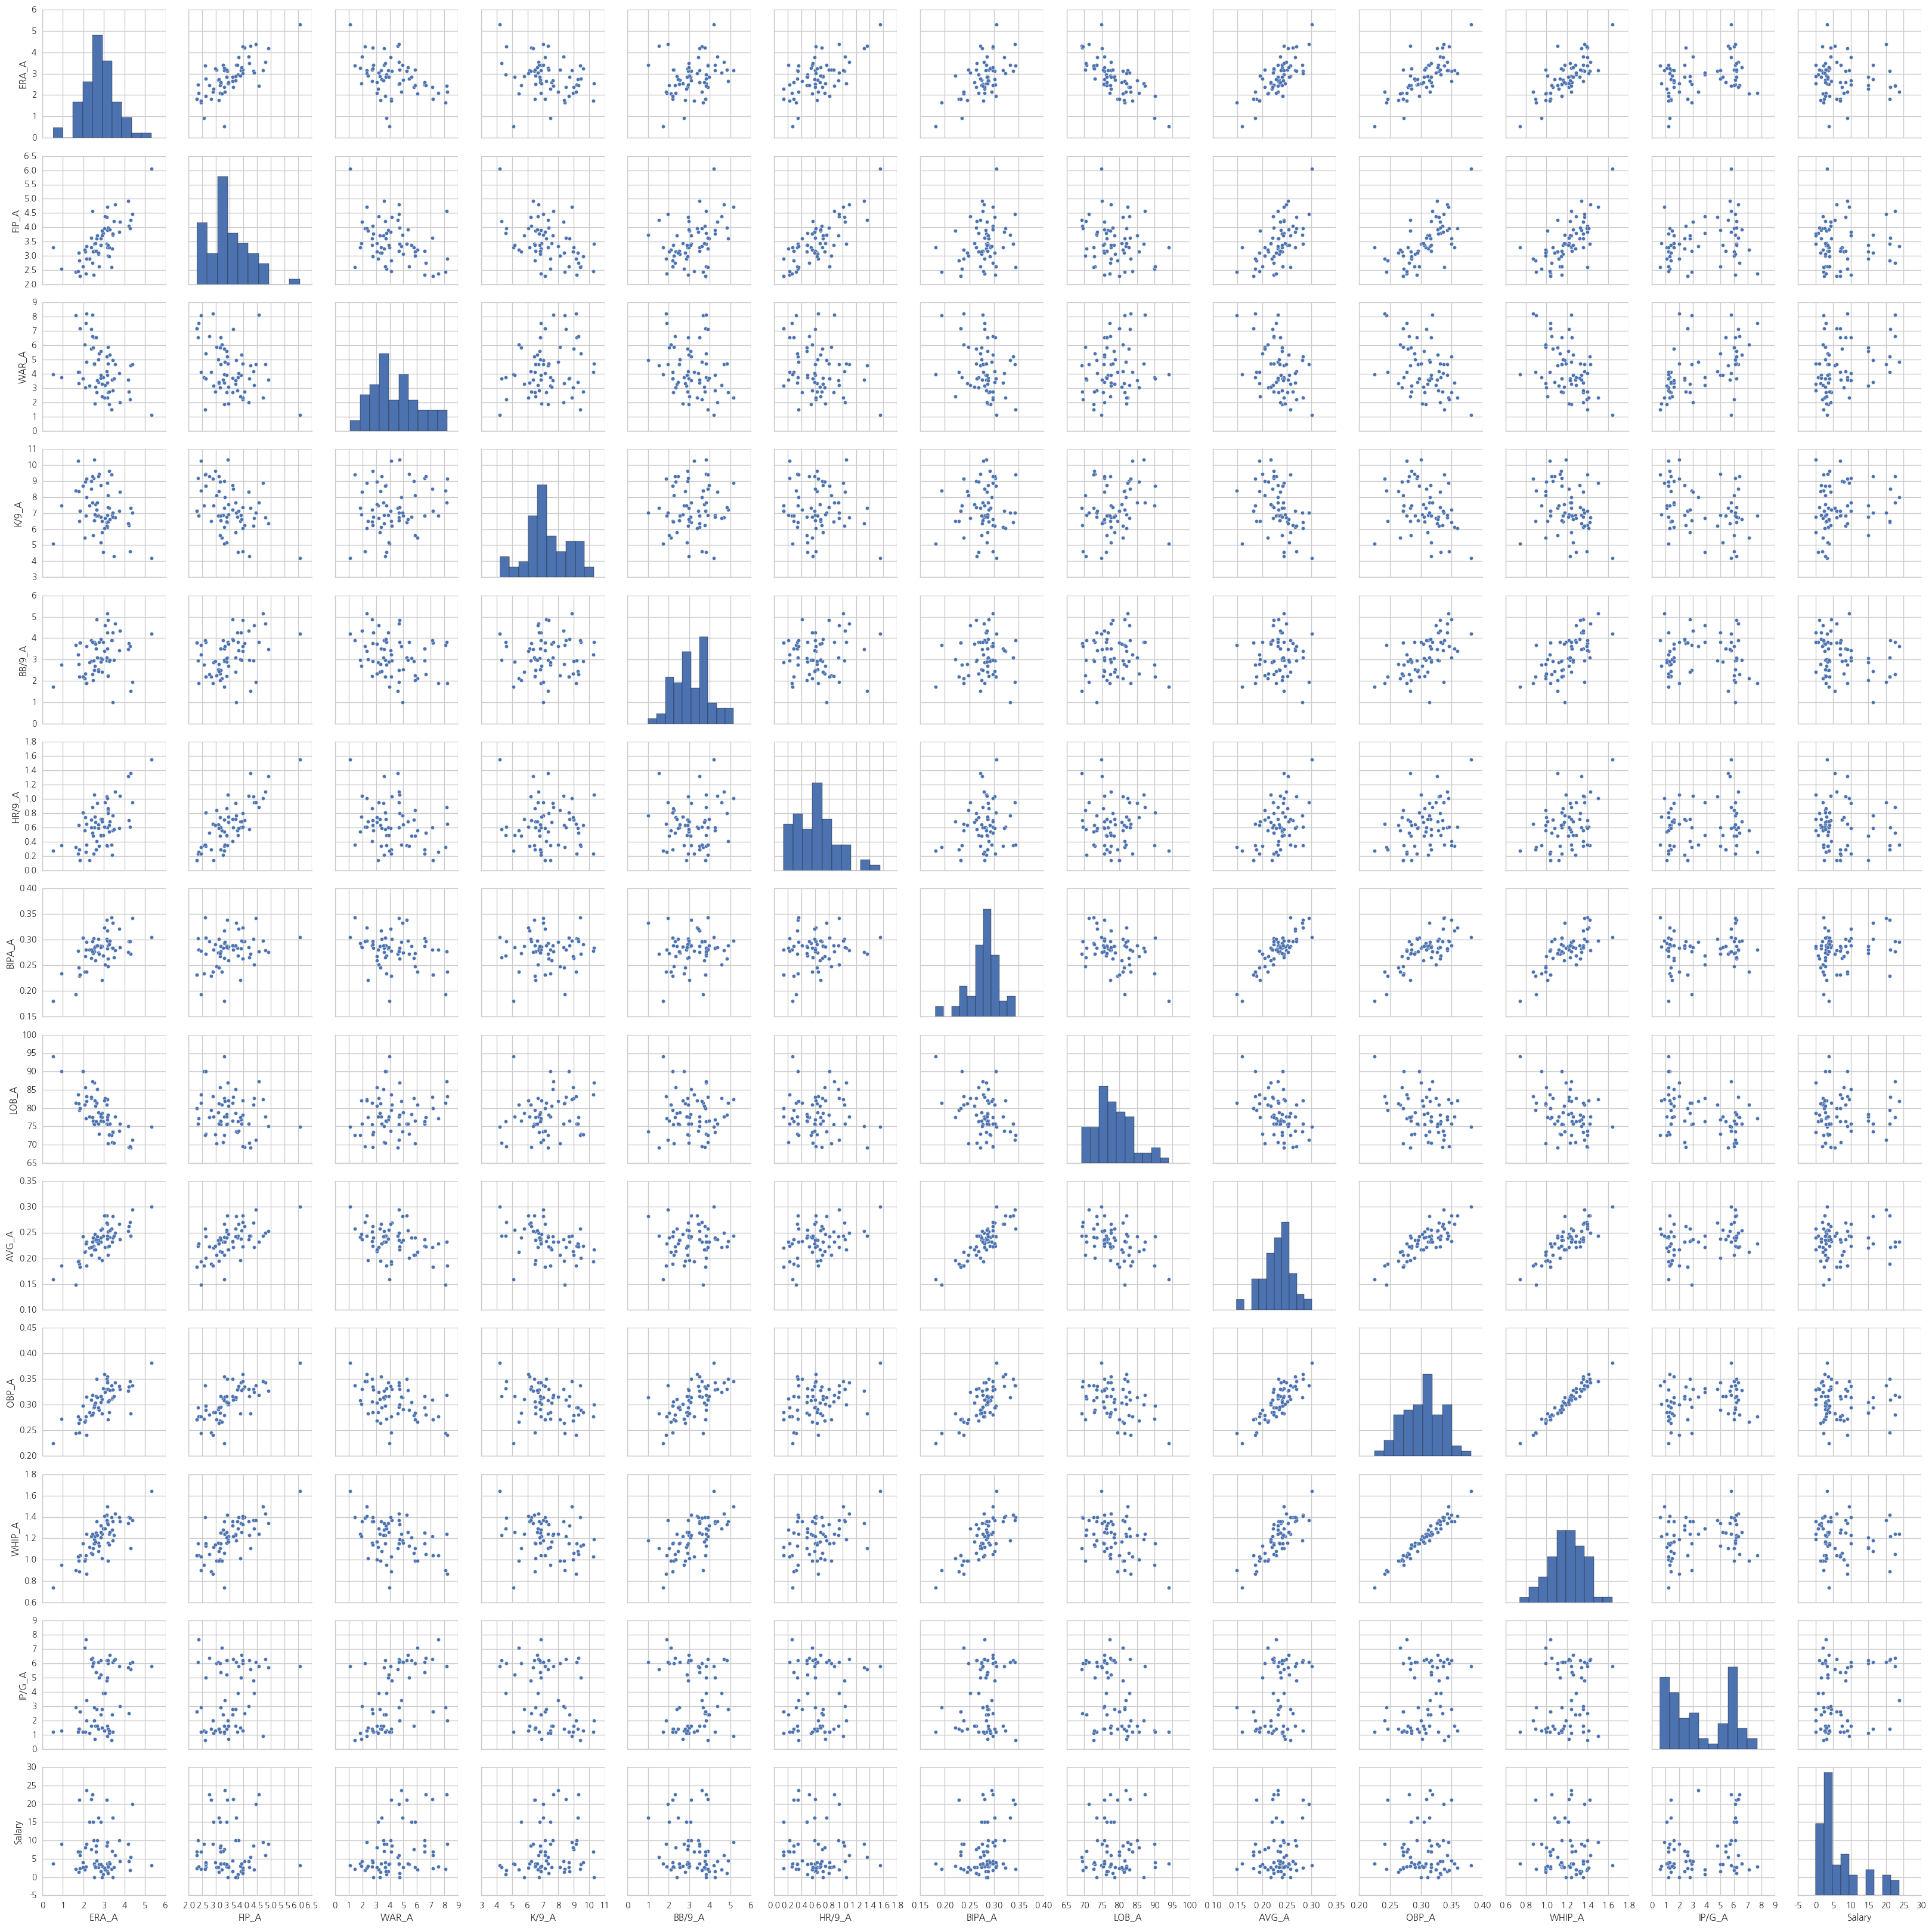

In [32]:
dff = pd.concat([df_pitcher.ix[:,1:13], df_pitcher.ix[:,-1]],axis=1)
sns.pairplot(dff)
plt.show()

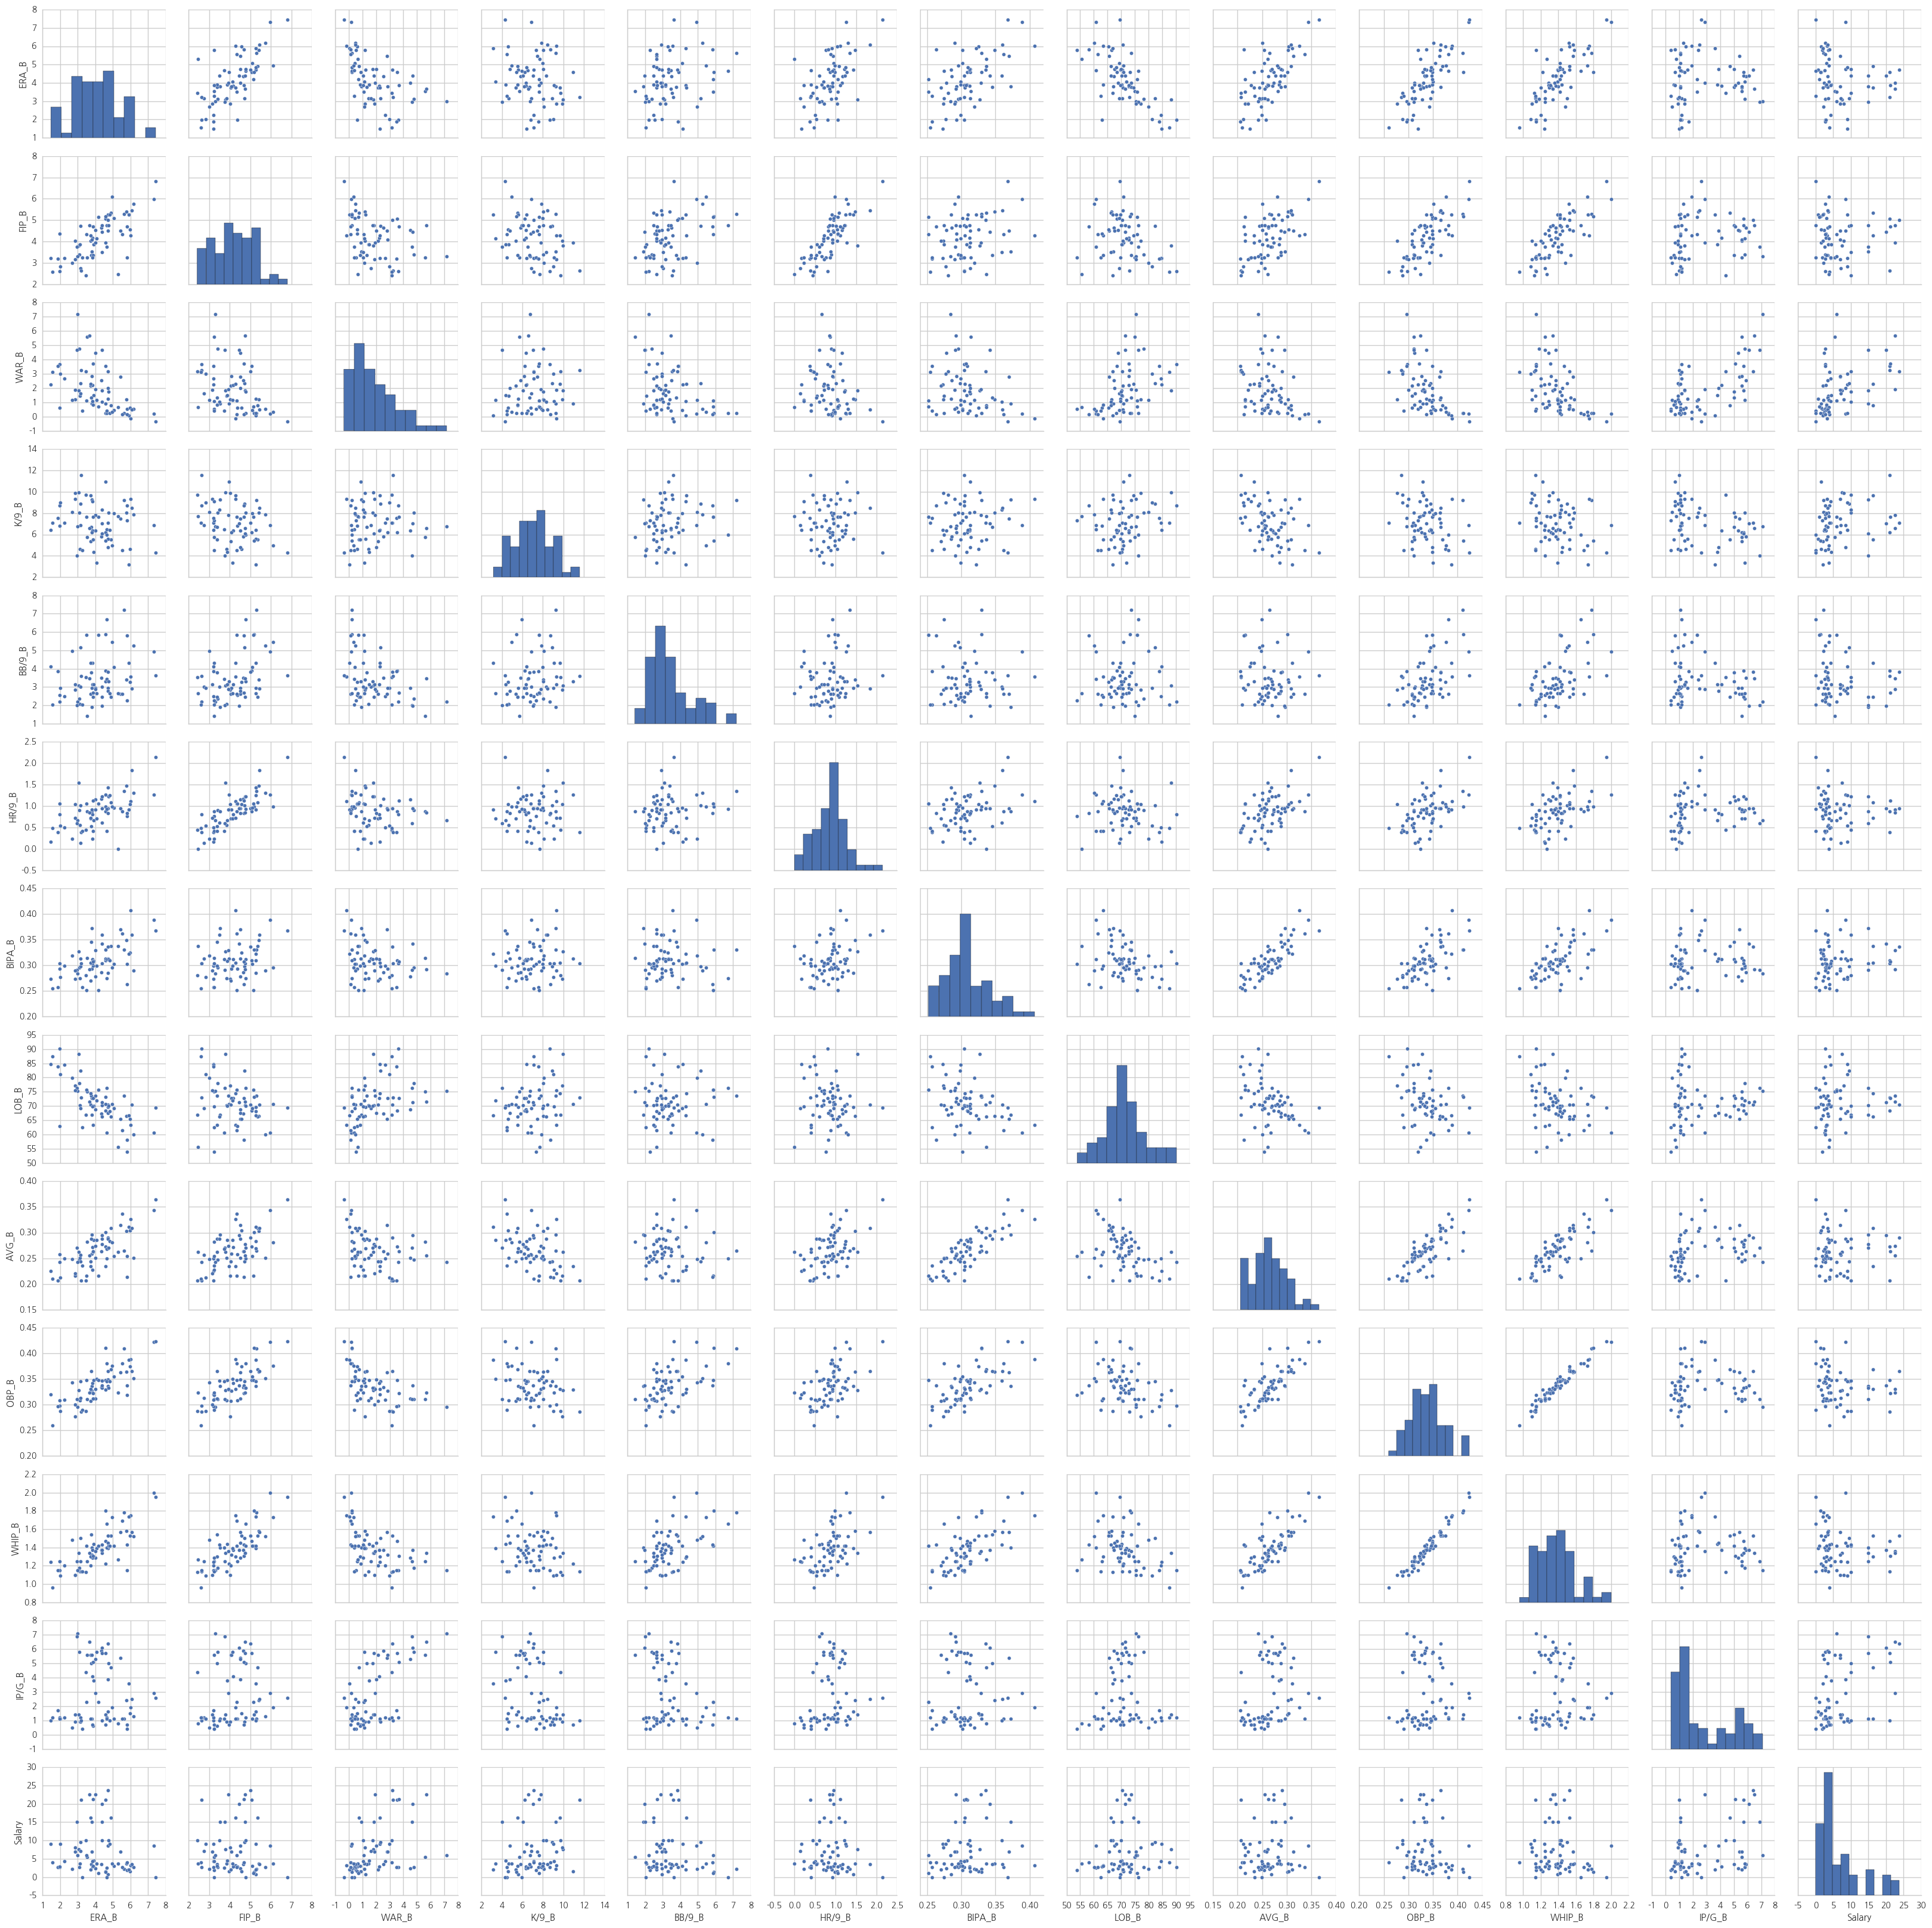

In [34]:
dff = pd.concat([df_pitcher.ix[:,13:25], df_pitcher.ix[:,-1]],axis=1)
sns.pairplot(dff)
plt.show()

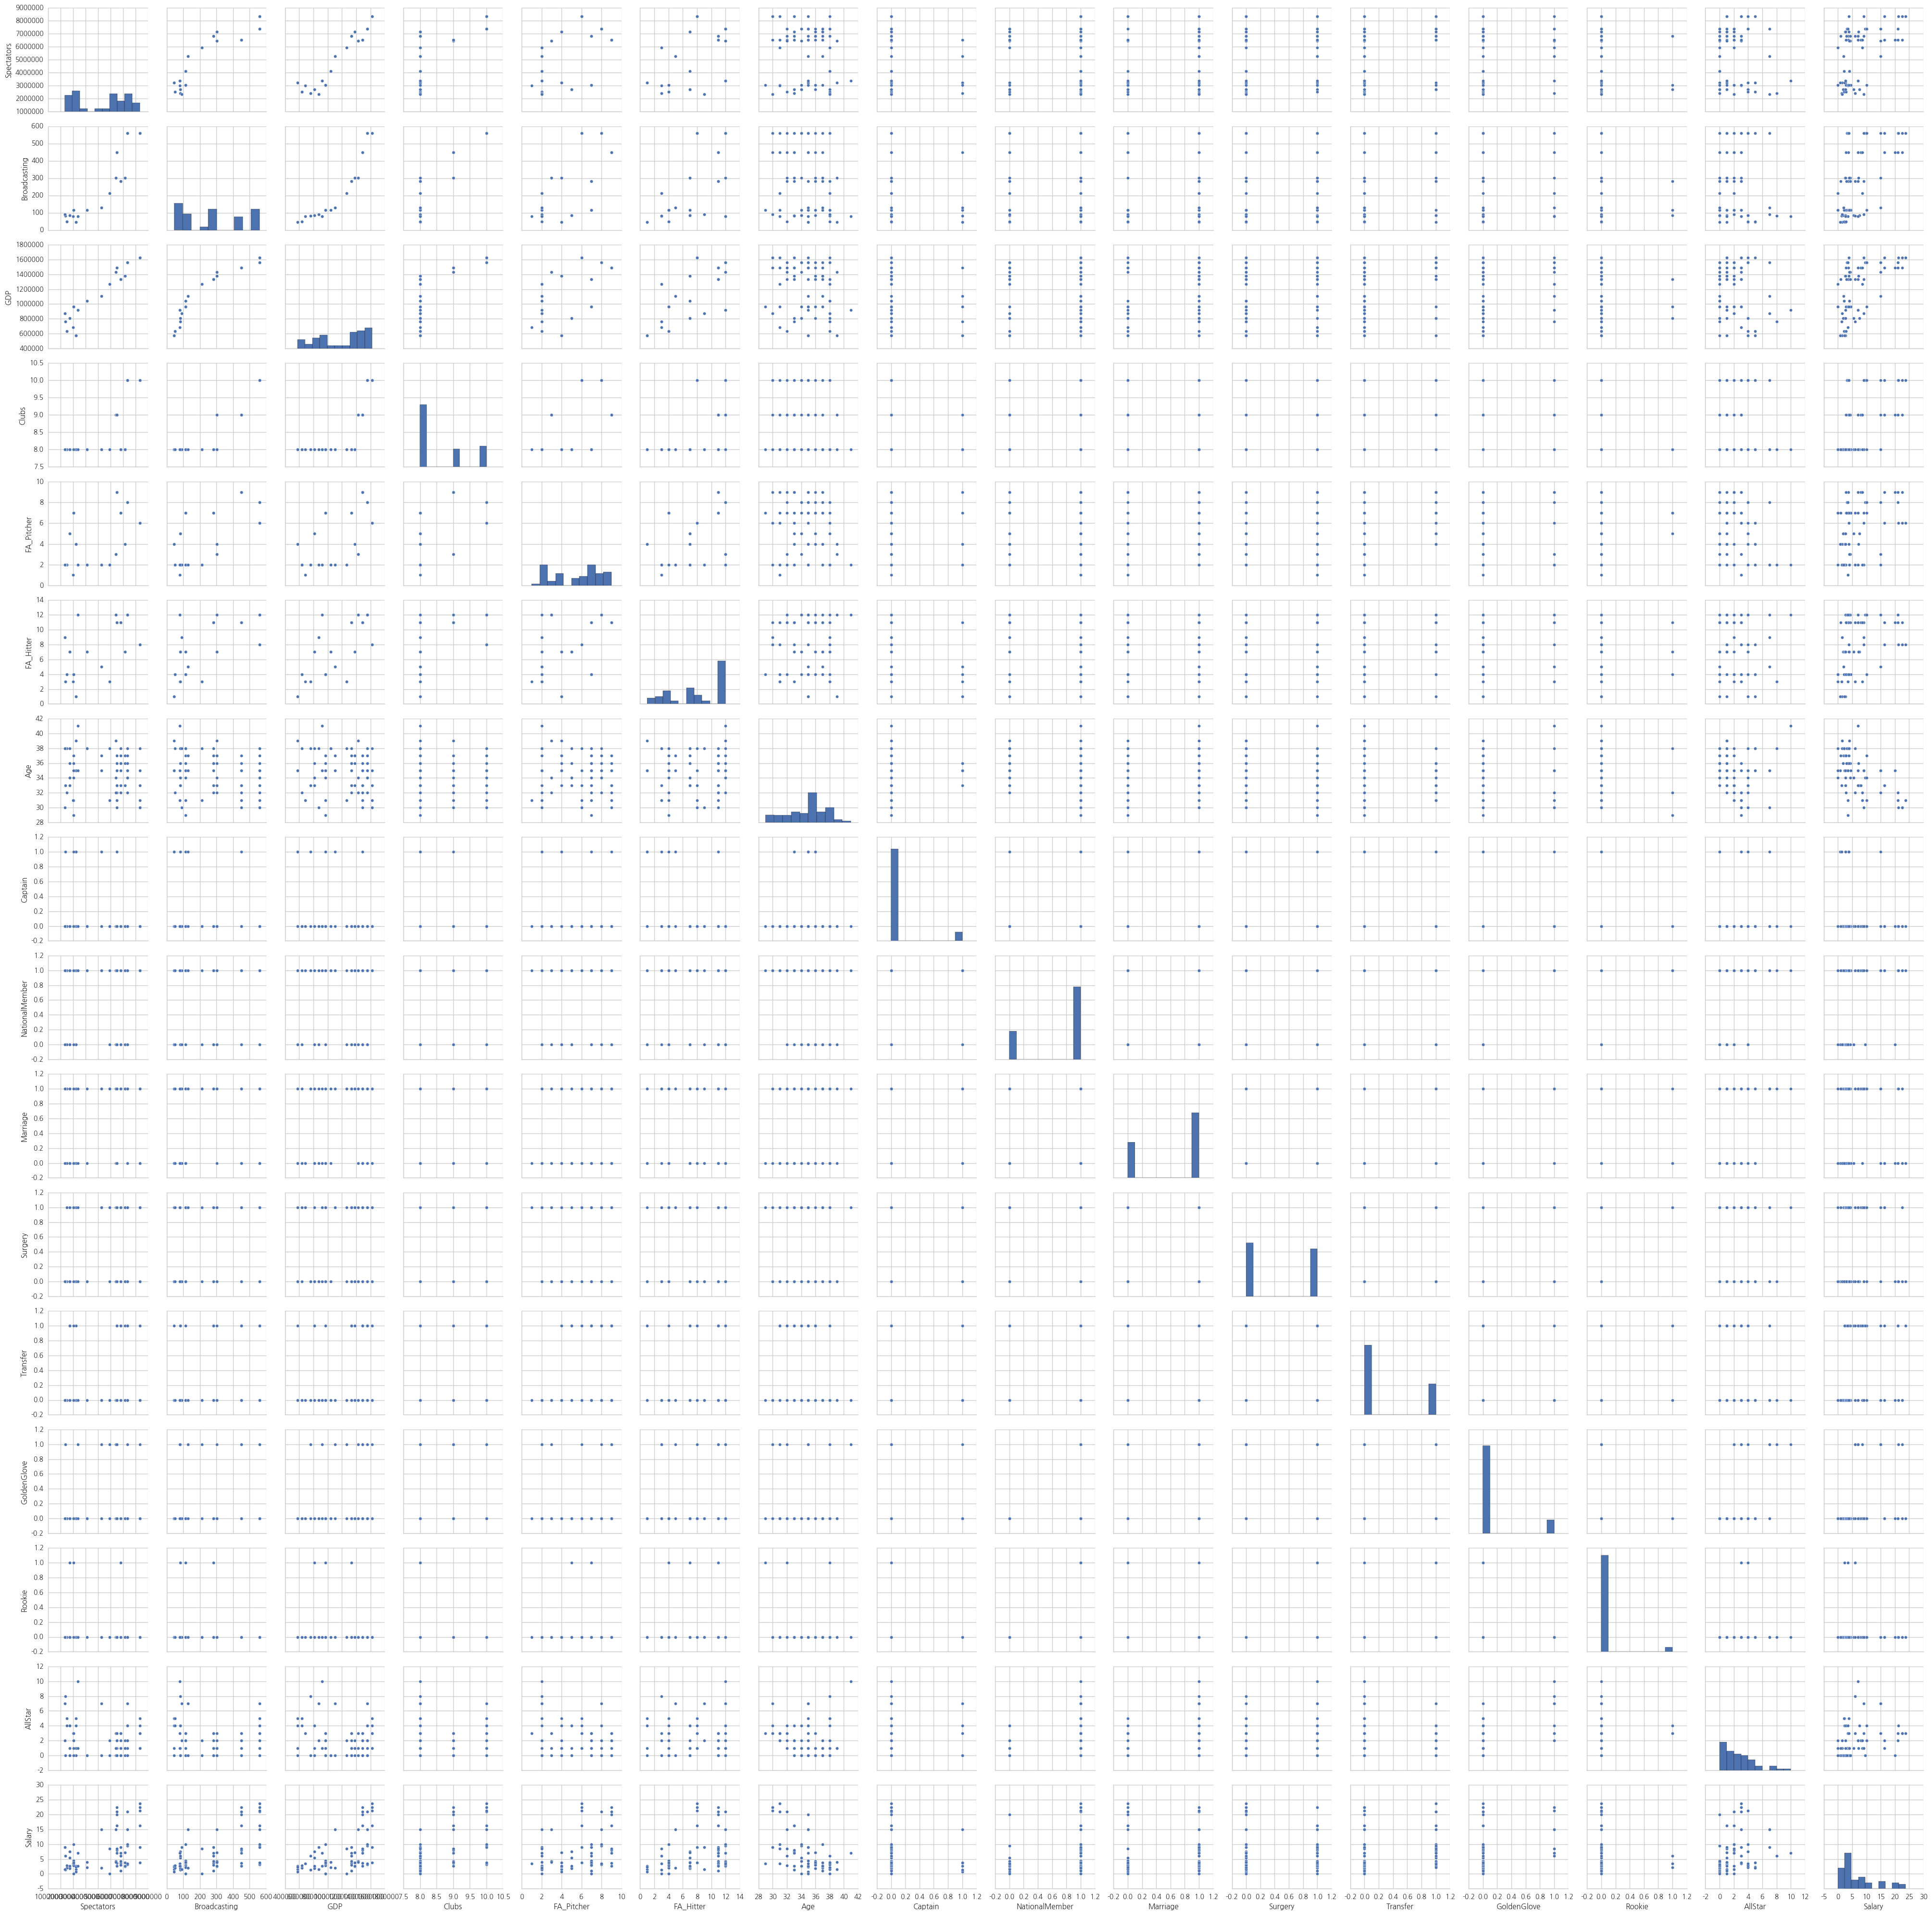

In [39]:
dff = pd.concat([df_pitcher.ix[:,25:40], df_pitcher.ix[:,-1]],axis=1)
sns.pairplot(dff)
plt.show()

# 4. 로그변환

# 정규성검정 - 최고기록

In [43]:
sm.stats.stattools.omni_normtest(df_pitcher['ERA_A'])

NormaltestResult(statistic=3.3198811037431835, pvalue=0.19015028384401486)

In [44]:
sm.stats.stattools.omni_normtest(df_pitcher['FIP_A'])

NormaltestResult(statistic=9.7941046572921753, pvalue=0.0074685655331474202)

In [45]:
sm.stats.stattools.omni_normtest(df_pitcher['WAR_A'])

NormaltestResult(statistic=3.3786102563071978, pvalue=0.18464778597298181)

In [46]:
sm.stats.stattools.omni_normtest(df_pitcher['K/9_A'])

NormaltestResult(statistic=0.15091881688572997, pvalue=0.9273173710260989)

In [47]:
sm.stats.stattools.omni_normtest(df_pitcher['BB/9_A'])

NormaltestResult(statistic=0.41261595744936491, pvalue=0.81358247160241848)

In [49]:
sm.stats.stattools.omni_normtest(df_pitcher['HR/9_A'])

NormaltestResult(statistic=5.9744572244900276, pvalue=0.050426996007077167)

In [50]:
sm.stats.stattools.omni_normtest(df_pitcher['BIPA_A'])

NormaltestResult(statistic=7.9210567880034679, pvalue=0.019053044117109785)

In [51]:
sm.stats.stattools.omni_normtest(df_pitcher['LOB_A'])

NormaltestResult(statistic=4.9455897249788565, pvalue=0.08434878600142294)

In [52]:
sm.stats.stattools.omni_normtest(df_pitcher['AVG_A'])

NormaltestResult(statistic=1.9629497184947571, pvalue=0.37475797579620429)

In [53]:
sm.stats.stattools.omni_normtest(df_pitcher['OBP_A'])

NormaltestResult(statistic=0.3613447446034031, pvalue=0.83470878762073675)

In [54]:
sm.stats.stattools.omni_normtest(df_pitcher['WHIP_A'])

NormaltestResult(statistic=0.48469947901753441, pvalue=0.78478166039748343)

In [56]:
sm.stats.stattools.omni_normtest(df_pitcher['IP/G_A'])   #보류

NormaltestResult(statistic=122.19189339789332, pvalue=2.9266277215197655e-27)

In [98]:
sm.stats.stattools.omni_normtest(df_pitcher['Salary']) 

NormaltestResult(statistic=16.691017871568441, pvalue=0.00023746057796466725)

# 로그변환 - 최고기록


In [157]:
df_pitcher1 = df_pitcher.copy()

In [158]:
df_pitcher1["LogFIP_A"]= np.log(df_pitcher1["FIP_A"])
df_pitcher1["LogHR/9_A"]= np.log(df_pitcher1["HR/9_A"]+1)
df_pitcher1["LogBIPA_A"]= np.log(df_pitcher1["BIPA_A"]+1)
df_pitcher1["LogLOB_A"]= np.log(df_pitcher1["LOB_A"])
df_pitcher1["LogIP/G_A"]= np.log(df_pitcher1["IP/G_A"]+1)

del df_pitcher1["FIP_A"]
del df_pitcher1["HR/9_A"]
del df_pitcher1["BIPA_A"]
del df_pitcher1["LOB_A"]
del df_pitcher1["IP/G_A"]

In [68]:
sm.stats.stattools.omni_normtest(df_pitcher1['LogFIP_A'])

NormaltestResult(statistic=0.15373500092792677, pvalue=0.92601254171039815)

In [69]:
sm.stats.stattools.omni_normtest(df_pitcher1['LogHR/9_A'])

NormaltestResult(statistic=0.38288938678391277, pvalue=0.82576529412103006)

In [70]:
sm.stats.stattools.omni_normtest(df_pitcher1['LogBIPA_A'])   # 하락

NormaltestResult(statistic=9.8425915105067308, pvalue=0.0072896790845565825)

In [71]:
sm.stats.stattools.omni_normtest(df_pitcher1['LogLOB_A'])

NormaltestResult(statistic=2.2629046369774604, pvalue=0.32256444976216797)

In [72]:
sm.stats.stattools.omni_normtest(df_pitcher1['LogIP/G_A'])

NormaltestResult(statistic=83.956725005698658, pvalue=5.8752832053687465e-19)

# 정규성 검정 - 직전연도 기록

In [73]:
sm.stats.stattools.omni_normtest(df_pitcher['ERA_B'])

NormaltestResult(statistic=0.41392859895655298, pvalue=0.81304867573136108)

In [74]:
sm.stats.stattools.omni_normtest(df_pitcher['FIP_B'])

NormaltestResult(statistic=0.93104674527769526, pvalue=0.62780644247612294)

In [75]:
sm.stats.stattools.omni_normtest(df_pitcher['WAR_B'])

NormaltestResult(statistic=14.01062033427427, pvalue=0.00090705255374827194)

In [76]:
sm.stats.stattools.omni_normtest(df_pitcher['K/9_B'])

NormaltestResult(statistic=0.3600490101137756, pvalue=0.83524974331801172)

In [77]:
sm.stats.stattools.omni_normtest(df_pitcher['BB/9_B'])

NormaltestResult(statistic=14.045678598028859, pvalue=0.00089129125444078734)

In [80]:
sm.stats.stattools.omni_normtest(df_pitcher['HR/9_B'])

NormaltestResult(statistic=4.4108270662346483, pvalue=0.11020494248672139)

In [79]:
sm.stats.stattools.omni_normtest(df_pitcher['BIPA_B'])

NormaltestResult(statistic=5.4898711498662678, pvalue=0.064252440278924489)

In [81]:
sm.stats.stattools.omni_normtest(df_pitcher['LOB_B'])

NormaltestResult(statistic=2.2293468802893273, pvalue=0.32802238035219428)

In [82]:
sm.stats.stattools.omni_normtest(df_pitcher['AVG_B'])

NormaltestResult(statistic=2.4697829589896645, pvalue=0.29086632561578296)

In [83]:
sm.stats.stattools.omni_normtest(df_pitcher['OBP_B'])

NormaltestResult(statistic=2.7932879073740198, pvalue=0.24742594504465348)

In [84]:
sm.stats.stattools.omni_normtest(df_pitcher['WHIP_B'])

NormaltestResult(statistic=6.4308091541961279, pvalue=0.040139091181115999)

In [85]:
sm.stats.stattools.omni_normtest(df_pitcher['IP/G_B'])   #보류

NormaltestResult(statistic=20.397620317623975, pvalue=3.7214571782127159e-05)

# 로그변환 - 직전연도 기록

In [159]:
df_pitcher1["LogWAR_B"]= np.log(df_pitcher1["WAR_B"]+3)
df_pitcher1["LogBB/9_B"]= np.log(df_pitcher1["BB/9_B"]+1)
df_pitcher1["LogBIPA_B"]= np.log(df_pitcher1["BIPA_B"]+1)
df_pitcher1["LogWHIP_B"]= np.log(df_pitcher1["WHIP_B"]+1)
#df_pitcher1["LogIP/G_B"]= np.log(df_pitcher1["IP/G_B"]+1)


del df_pitcher1["WAR_B"]
del df_pitcher1["BB/9_B"]
del df_pitcher1["BIPA_B"]
del df_pitcher1["WHIP_B"]




In [160]:
df_pitcher1["LogSalary"]= np.log(df_pitcher1["Salary"]+1)
del df_pitcher1["Salary"]

In [94]:
sm.stats.stattools.omni_normtest(df_pitcher1['LogWAR_B'])

NormaltestResult(statistic=3.5740773940385671, pvalue=0.16745532210148104)

In [95]:
sm.stats.stattools.omni_normtest(df_pitcher1['LogBB/9_B'])

NormaltestResult(statistic=3.1858129817893852, pvalue=0.20333376431672354)

In [96]:
sm.stats.stattools.omni_normtest(df_pitcher1['LogBIPA_B'])

NormaltestResult(statistic=4.3162964148215837, pvalue=0.1155388770974104)

In [97]:
sm.stats.stattools.omni_normtest(df_pitcher1['LogWHIP_B'])

NormaltestResult(statistic=2.7267986203086494, pvalue=0.25578978858675216)

In [100]:
sm.stats.stattools.omni_normtest(df_pitcher1['LogSalary'])

NormaltestResult(statistic=0.12675206331489294, pvalue=0.93859046759336651)

# OLS

In [161]:
model_sm = sm.OLS(df_pitcher1.ix[:,-1], df_pitcher1.ix[:,:-1])
result_sm = model_sm.fit()
print(result_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              LogSalary   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     5.532
Date:                Wed, 08 Mar 2017   Prob (F-statistic):           5.38e-06
Time:                        12:53:52   Log-Likelihood:                -5.8372
No. Observations:                  68   AIC:                             91.67
Df Residuals:                      28   BIC:                             180.5
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -10.5452     15.779     -0.

In [112]:
df_pitcher1

,const,ERA_A,FIP_A,WAR_A,K/9_A,BB/9_A,HR/9_A,BIPA_A,LOB_A,AVG_A,OBP_A,WHIP_A,IP/G_A,ERA_B,FIP_B,K/9_B,HR/9_B,LOB_B,AVG_B,OBP_B,IP/G_B,Spectators,Broadcasting,GDP,Clubs,FA_Pitcher,FA_Hitter,Age,Captain,NationalMember,Marriage,Surgery,Transfer,GoldenGlove,Rookie,AllStar,LogFIP_A,LogHR/9_A,LogBIPA_A,LogLOB_A,LogIP/G_A,LogWAR_B,LogBB/9_B,LogBIPA_B,LogWHIP_B,LogSalary
1,1.0,3.19,3.01,5.87,8.09,2.26,0.84,0.248,70.4,0.206,0.271,0.99,6.0,3.11,3.40,8.03,0.90,78.1,0.247,0.311,5.8,3220624.0,46.00,576873.0,8.0,4.0,1.0,35.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,1.101940,0.609766,0.221542,4.254193,1.945910,2.050270,1.211941,0.259283,0.779325,1.300192
2,1.0,1.64,2.44,8.08,8.41,3.67,0.32,0.193,81.5,0.148,0.244,0.90,2.9,5.63,5.29,9.23,1.35,73.6,0.265,0.410,1.1,2722801.0,83.67,810915.0,8.0,5.0,7.0,38.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,4.0,0.891998,0.277632,0.176471,4.400603,1.360977,1.175573,2.104134,0.285179,1.022451,1.178655
3,1.0,2.37,3.30,5.75,9.00,2.92,0.71,0.264,82.7,0.206,0.279,1.06,1.6,3.08,3.80,9.93,1.54,88.2,0.262,0.328,1.4,2722801.0,83.67,810915.0,8.0,5.0,7.0,33.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,4.0,1.193922,0.536493,0.234281,4.415220,0.955511,1.570697,1.406097,0.282921,0.850151,2.140066
4,1.0,4.29,4.25,4.57,7.33,1.52,1.36,0.272,69.3,0.244,0.283,1.11,5.6,3.54,3.25,5.73,0.87,75.0,0.282,0.311,5.6,2722801.0,83.67,810915.0,8.0,5.0,7.0,34.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.446919,0.858662,0.240590,4.238445,1.887070,2.151762,0.879627,0.273076,0.810930,1.871802
5,1.0,2.50,2.33,6.53,9.19,2.95,0.23,0.302,75.8,0.224,0.294,1.15,6.1,3.46,2.41,9.71,0.44,66.9,0.207,0.288,4.4,3040254.0,115.00,966055.0,8.0,7.0,4.0,31.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,0.845868,0.207014,0.263902,4.328098,1.960095,1.819699,1.510722,0.247641,0.756122,2.397895
6,1.0,3.16,3.30,3.38,6.15,3.50,0.34,0.318,77.6,0.267,0.355,1.36,1.6,3.15,3.86,4.66,0.55,70.3,0.251,0.308,0.9,6810028.0,282.00,1332681.0,8.0,7.0,11.0,38.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.193922,0.292670,0.276115,4.351567,0.955511,1.490654,1.118415,0.242946,0.760806,1.541159
7,1.0,3.55,4.81,4.68,6.73,4.69,1.10,0.279,77.6,0.249,0.343,1.43,6.3,3.50,4.34,7.65,1.05,75.8,0.216,0.348,2.3,6810028.0,282.00,1332681.0,8.0,7.0,11.0,32.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,3.0,1.570697,0.741937,0.246079,4.351567,1.987874,1.415853,1.924249,0.224742,0.883768,1.945910
8,1.0,0.92,2.55,3.74,7.47,2.76,0.35,0.234,90.0,0.186,0.272,0.95,1.3,1.48,3.21,6.42,0.17,84.8,0.225,0.320,1.0,6810028.0,282.00,1332681.0,8.0,7.0,11.0,35.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,3.0,0.936093,0.300105,0.210261,4.499810,0.832909,1.660131,1.633154,0.241376,0.806476,2.302585
9,1.0,4.21,4.04,2.75,6.24,3.75,0.70,0.297,69.4,0.262,0.335,1.40,2.5,2.24,3.21,7.09,0.50,84.5,0.249,0.310,1.2,6810028.0,282.00,1332681.0,8.0,7.0,11.0,36.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.396245,0.530628,0.260054,4.239887,1.252763,1.731656,1.249902,0.261595,0.788457,1.673351
10,1.0,3.40,3.25,3.58,6.87,3.90,0.21,0.284,70.7,0.232,0.312,1.28,2.4,3.16,2.74,6.89,0.14,69.2,0.256,0.313,1.2,7156157.0,302.00,1377457.0,8.0,4.0,7.0,36.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.178655,0.190620,0.249980,4.258446,1.223775,1.530395,1.391282,0.272315,0.810930,2.098018


# Heatmap

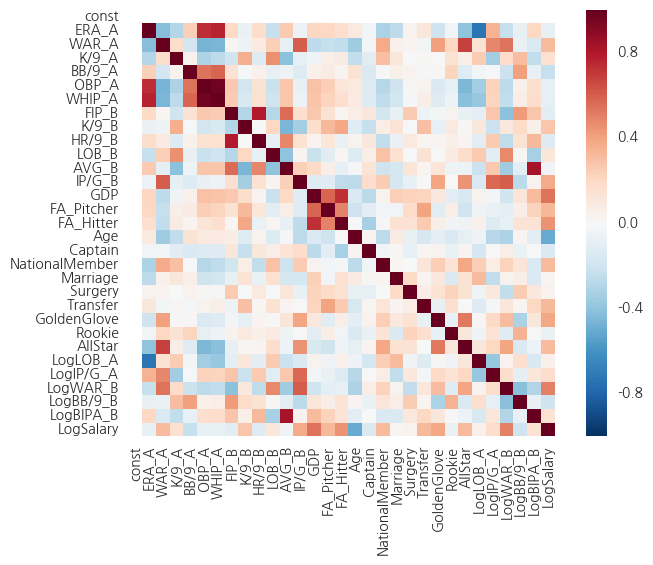

In [137]:
cormat = df_pitcher1.corr()
sns.heatmap(cormat, square=True)
plt.show()

1.LogHR/9_A   2. Broadcasting    3. LogFIP_A   4. AVG_A    5. OBP_B    6. LogWHIP_B      7. ERA_B     

In [165]:
df_pitcher2 = df_pitcher1.copy()
del df_pitcher2["Broadcasting"]
del df_pitcher2["LogFIP_A"]
del df_pitcher2["AVG_A"]
del df_pitcher2["OBP_B"]
del df_pitcher2["LogWHIP_B"]
del df_pitcher2["ERA_B"]
del df_pitcher2["LogHR/9_A"]


In [166]:
model_sm = sm.OLS(df_pitcher2.ix[:,-1], df_pitcher2.ix[:,:-1])
result_sm = model_sm.fit()
print(result_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              LogSalary   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     6.695
Date:                Wed, 08 Mar 2017   Prob (F-statistic):           1.10e-07
Time:                        12:55:04   Log-Likelihood:                -12.668
No. Observations:                  68   AIC:                             91.34
Df Residuals:                      35   BIC:                             164.6
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -5.8668     11.255     -0.

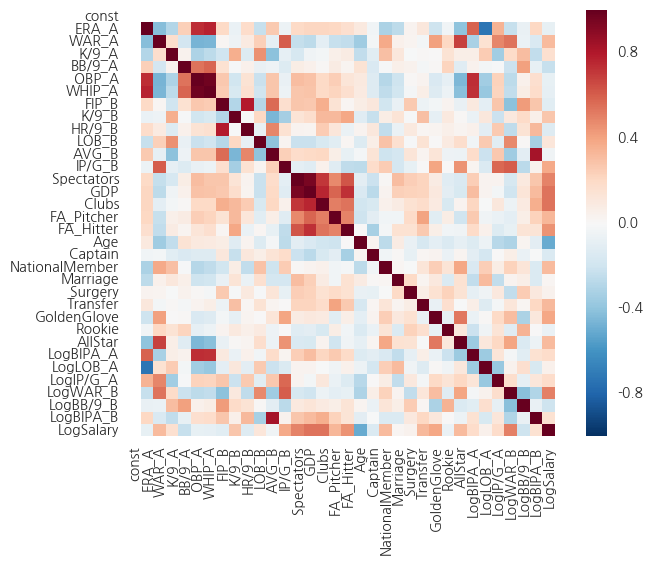

In [148]:
cormat = df_pitcher2.corr()
sns.heatmap(cormat, square=True)
plt.show()

1. LogBIPA_A     2. Clubs    3. K/9_A   4. Spectators   5.OBP_A  

In [167]:
df_pitcher3 = df_pitcher2.copy()
del df_pitcher3["Spectators"]
del df_pitcher3["LogBIPA_A"]
del df_pitcher3["Clubs"]
del df_pitcher3["OBP_A"]
del df_pitcher3["K/9_A"]

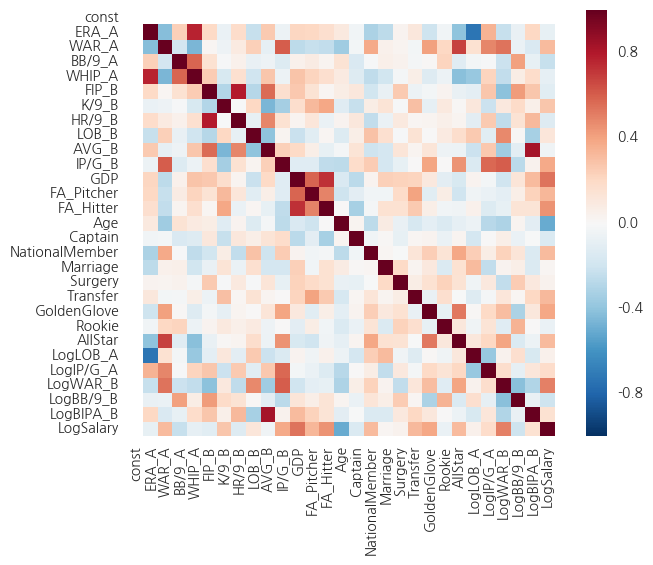

In [168]:
cormat = df_pitcher3.corr()
sns.heatmap(cormat, square=True)
plt.show()

1. BB/9_A    2. ERA_A   3. WHIP_A   4. FA_Hitter   5. FA_Pitcher   6. IP/G_B    7. AVG_B    8.FIP_B   9.AllStar  10.GoldenGlove  11.WAR_A

In [174]:
df_pitcher4 = df_pitcher3.copy()
del df_pitcher4["BB/9_A"]
del df_pitcher4["ERA_A"]
del df_pitcher4["WHIP_A"]
del df_pitcher4["FA_Hitter"]
del df_pitcher4["FA_Pitcher"]
del df_pitcher4["IP/G_B"]
del df_pitcher4["AVG_B"]
del df_pitcher4["FIP_B"]
del df_pitcher4["AllStar"]
del df_pitcher4["GoldenGlove"]
del df_pitcher4["WAR_A"]

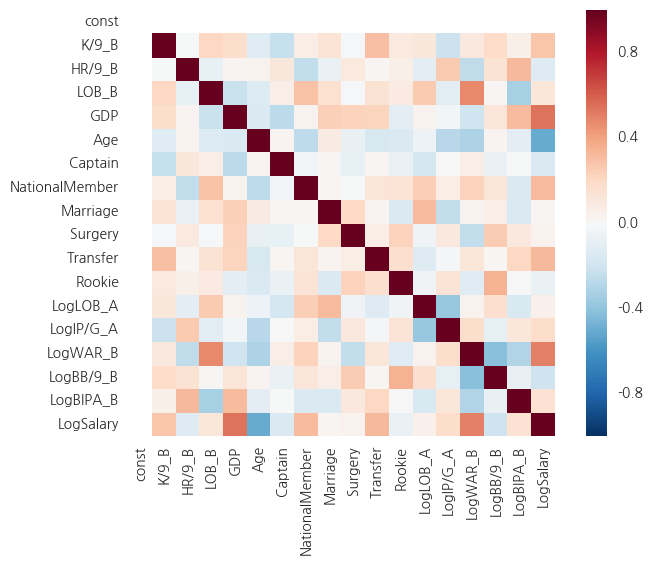

In [175]:
cormat = df_pitcher4.corr()
sns.heatmap(cormat, square=True)
plt.show()

In [176]:
model_sm = sm.OLS(df_pitcher4.ix[:,-1], df_pitcher4.ix[:,:-1])
result_sm = model_sm.fit()
print(result_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              LogSalary   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     12.88
Date:                Wed, 08 Mar 2017   Prob (F-statistic):           1.06e-12
Time:                        13:11:59   Log-Likelihood:                -24.419
No. Observations:                  68   AIC:                             82.84
Df Residuals:                      51   BIC:                             120.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -4.2779      4.352     -0.

# Cross validation


In [116]:
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
pitcherFeatures = df_pitcher.ix[:,:-1]
pitcherY = df_pitcher.ix[:,-1]
model = LinearRegression()
cv = KFold(len(pitcherFeatures), 10)

cross_val_score(model,pitcherFeatures, pitcherY, "r2", cv) 

array([-11.15509118,  -1.83590553,   0.65908823, -33.14461095,
        -2.82109568, -36.33317141,  -1.69063048,  -9.71925853,
         0.26659387,  -0.28758547])

##  - 1차 변수제거

In [115]:
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
pitcherFeatures = df_pitcher1.ix[:,:-1]
pitcherY = df_pitcher1.ix[:,-1]
model = LinearRegression()
cv = KFold(len(pitcherFeatures), 10)

cross_val_score(model,pitcherFeatures, pitcherY, "r2", cv) 

array([ -4.34618352,  -5.54915068,  -3.89661227, -33.4218712 ,
        -2.18804464,  -2.48856332,   0.41971284, -16.6506752 ,
        -4.33566794,  -4.60334959])

In [ ]:
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
pitcherFeatures = df_pitcher.ix[:,:-1]
pitcherY = df_pitcher.ix[:,-1]
model = LinearRegression()
cv = KFold(len(pitcherFeatures), 10)

cross_val_score(model,pitcherFeatures, pitcherY, "r2", cv) 